<a href="https://colab.research.google.com/github/RedPanda54/Machine_Learning_study/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**전처리 및 EDA**

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import seaborn as sns

np.random.seed(10)

URL = "https://raw.githubusercontent.com/RedPanda54/Machine_Learning_study/main/diabetes_prediction_dataset.csv"
df = pd.read_csv(URL)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [65]:
# 데이터 통계량 파악
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [66]:
# 결측치 확인
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [67]:
df # 현재 100000개의 행

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [68]:
df.diabetes.value_counts(normalize = True).mul(100) # Target이 되는 deabetes 파악

0    91.5
1     8.5
Name: diabetes, dtype: float64

In [69]:
#중복행 제거
df.drop_duplicates(inplace=True)

df # 3854개의 행이 제거되었다.

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [70]:
df['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [71]:
# Label Encoding for gender column
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender']) # Female = 0, Male = 1
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [72]:
df['smoking_history'].value_counts()

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64

In [73]:
# smoking history을 숫자형 데이터로 전환
smoking_history_mapping = {'never': 0, 'No Info': -1, 'current': 2, 'former': 1, 'ever': 2, 'not current': 0, 'unknown': 999}
df['smoking_history'] = df['smoking_history'].map(smoking_history_mapping)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,-1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0


In [74]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,0.416065,41.794326,0.077601,0.040803,0.029143,27.321461,5.532609,138.218231,0.088220
std,0.493287,22.462948,0.267544,0.197833,0.993422,6.767716,1.073232,40.909771,0.283616
min,0.000000,0.080000,0.000000,0.000000,-1.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,-1.000000,23.400000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,2.000000,95.690000,9.000000,300.000000,1.000000


In [75]:
df = df[df['age'].mod(1) == 0] # 'age' 열의 값이 정수인 행들만 선택

df # 94133개의 행만 남았다.

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,-1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,-1,24.60,4.8,145,0
99996,0,2.0,0,0,-1,17.37,6.5,100,0
99997,1,66.0,0,0,1,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [76]:
df['age'] = df['age'].astype(int) # age열에는 정수만 남았기 때문에 데이터 타입을 int로 변환

<ipython-input-76-f970472458f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype(int) # age열에는 정수만 남았기 때문에 데이터 타입을 int로 변환


In [77]:
df.info() # int64타입으로 잘 변경된 모습.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94133 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               94133 non-null  int64  
 1   age                  94133 non-null  int64  
 2   hypertension         94133 non-null  int64  
 3   heart_disease        94133 non-null  int64  
 4   smoking_history      94133 non-null  int64  
 5   bmi                  94133 non-null  float64
 6   HbA1c_level          94133 non-null  float64
 7   blood_glucose_level  94133 non-null  int64  
 8   diabetes             94133 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 7.2 MB


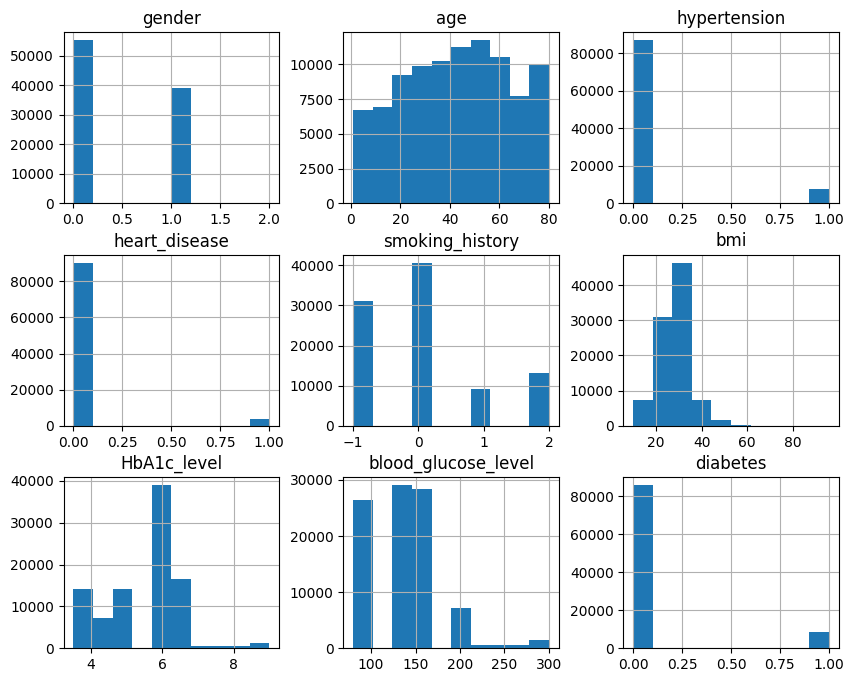

In [79]:
# 모든 column이 정수나 소수로 바뀌면서 전체 데이터에 대해 시각화가 가능해졌다.
df.hist(bins=10, figsize=(10,8))
plt.show()

In [80]:
df['diabetes'].value_counts()

0    85651
1     8482
Name: diabetes, dtype: int64

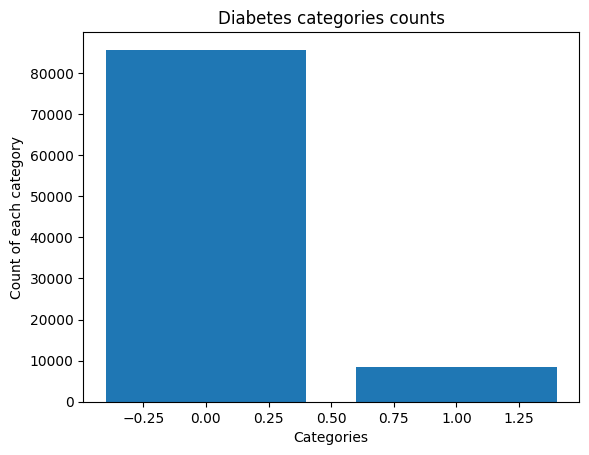

Count_of_0%: 90.9893448631192
Count_of_1%: 9.010655136880796


In [81]:
value_counts = df['diabetes'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Categories')
plt.ylabel('Count of each category')
plt.title('Diabetes categories counts')
plt.show()
print('Count_of_0%: {}'.format(100 *(len(df[df['diabetes'] == 0])/len(df)))) # 0 -> 90.99%, 1 -> 9.01%
print('Count_of_1%: {}'.format(100 *(len(df[df['diabetes'] == 1])/len(df))))

**데이터 분할**

In [82]:
X = df.iloc[:,:-1].values # 마지막 열을 제외한 모든 열을 선택
y = df.iloc[:,-1].values  # 마지막 열을 선택, 타켓 변수 = diabetes

In [83]:
from sklearn.model_selection import train_test_split # train set과 test set을 나누기 위해 import

# 데이터를 train set과 test set으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# train set에서 validation set을 따로 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [84]:
# standardization
from sklearn import preprocessing
stand = preprocessing.StandardScaler()

X_train = stand.fit_transform(X_train) # train set의 독립변수
X_test = stand.transform(X_test) # test set의 독립변수
X_val  = stand.transform(X_val)  # validation의 독립변수

In [85]:
X_train

array([[-0.84060846,  1.47575305, -0.29627002, ...,  0.26223806,
        -0.50124054,  0.03942913],
       [-0.84060846,  0.01311052, -0.29627002, ..., -0.0310244 ,
         0.62259817,  0.03942913],
       [ 1.18798925, -0.35255011, -0.29627002, ..., -0.0833927 ,
        -0.50124054,  0.4777377 ],
       ...,
       [-0.84060846,  0.24164842, -0.29627002, ...,  1.67917458,
         0.52894495, -1.29984706],
       [ 1.18798925,  0.74443179, -0.29627002, ...,  0.22183966,
         3.05758204,  3.93550531],
       [-0.84060846, -0.94674864, -0.29627002, ..., -0.98562366,
        -1.43777279,  1.5004577 ]])

In [86]:
X_test

array([[ 1.18798925,  0.60730905, -0.29627002, ...,  0.37894456,
         0.15433204, -0.93458992],
       [-0.84060846, -0.1697198 , -0.29627002, ..., -0.97814248,
        -0.50124054,  1.5004577 ],
       [-0.84060846,  1.1558    , -0.29627002, ..., -0.0310244 ,
        -0.68854699,  0.03942913],
       ...,
       [ 1.18798925, -0.99245622, -0.29627002, ..., -0.41106862,
        -0.50124054,  0.50208817],
       [-0.84060846, -0.8096259 , -0.29627002, ...,  1.17793516,
         0.43529172, -0.93458992],
       [ 1.18798925, -1.26670169, -0.29627002, ..., -0.91978923,
         0.24798527, -0.20407563]])

In [87]:
X_val

array([[-0.84060846, -0.71821074, -0.29627002, ..., -0.0310244 ,
         0.24798527,  0.50208817],
       [ 1.18798925, -1.58665475, -0.29627002, ..., -1.80705782,
        -0.50124054,  0.50208817],
       [-0.84060846,  1.65858337, -0.29627002, ..., -1.06941294,
        -0.96950667, -0.30147754],
       ...,
       [-0.84060846,  0.01311052, -0.29627002, ...,  1.11210073,
         0.43529172, -0.93458992],
       [-0.84060846,  0.24164842, -0.29627002, ..., -0.31530945,
        -0.96950667, -1.29984706],
       [-0.84060846,  0.0588181 ,  3.37529938, ..., -0.0310244 ,
         0.99721108, -1.17809468]])

**기본 신경망 학습**

In [88]:
import tensorflow as tf
ann = tf.keras.models.Sequential() # Sequential 모델을 생성. 레이어를 순차적으로 쌓아 구성하는 기본적인 신경망 모델
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu')) # 첫 번째 은닉층을 추가. 뉴런 수는 6개, 'relu'함수를 activation으로 사용.
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu')) # 두 번째 은닉층을 추가. 뉴런 수는 6개, 'relu'함수를 activation으로 사용.
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid')) # 출력층을 추가. 뉴런 수는 1개, 'sigmoid'함수를 activation으로 사용.

In [89]:
# 모델 컴파일
# adam 옵티마이저 사용. adam은 grdient descent 알고리즘 중에 하나.
# loss function은 binary_crossentropy를 사용.
# 마지막으로 accuracy라는 지표를 사용해서 모델의 정확도를 평가.

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [90]:
# 실행시간 측정
%%time

# 신경망 모델 훈련
# batch_size = 한 번에 모델에 입력되는 샘플의 개수를 나타내는 매개변수
# epoch 개수는 30개

history = ann.fit(X_train, y_train, batch_size=32, epochs = 30, validation_data = (X_val, y_val))

Epoch 1/30
1507/1507 [==============================] - 5s 3ms/step - loss: 0.2313 - accuracy: 0.9225 - val_loss: 0.1246 - val_accuracy: 0.9551
Epoch 2/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1245 - accuracy: 0.9562 - val_loss: 0.1203 - val_accuracy: 0.9563
Epoch 3/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1217 - accuracy: 0.9574 - val_loss: 0.1184 - val_accuracy: 0.9573
Epoch 4/30
1507/1507 [==============================] - 4s 3ms/step - loss: 0.1202 - accuracy: 0.9577 - val_loss: 0.1175 - val_accuracy: 0.9577
Epoch 5/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1193 - accuracy: 0.9583 - val_loss: 0.1167 - val_accuracy: 0.9574
Epoch 6/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1185 - accuracy: 0.9582 - val_loss: 0.1157 - val_accuracy: 0.9578
Epoch 7/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1177 - accuracy: 0.9585 - val_loss: 0.1153 - val_accuracy:

In [91]:
# 성능평가
# 전자는 loss, 후자는 accuracy
ann.evaluate(X_test, y_test)

589/589 [==============================] - 1s 2ms/step - loss: 0.1103 - accuracy: 0.9583


[0.11028619110584259, 0.9583045840263367]

In [92]:
# 신경망 예측값
y_pred = ann.predict(X_test)
y_pred = (y_pred>0.5) # 예측치가 임계치인 0.5를 넘으면 1, 작으면 0

y_pred

589/589 [==============================] - 1s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [93]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred) # 실제 변수인 y_test와 예측 변수인 y_pred를 혼동 행렬로 비교

print(cm)
print(accuracy_score(y_test, y_pred)) # 정확도 출력

[[16971   106]
 [  679  1071]]
0.9583045625962713


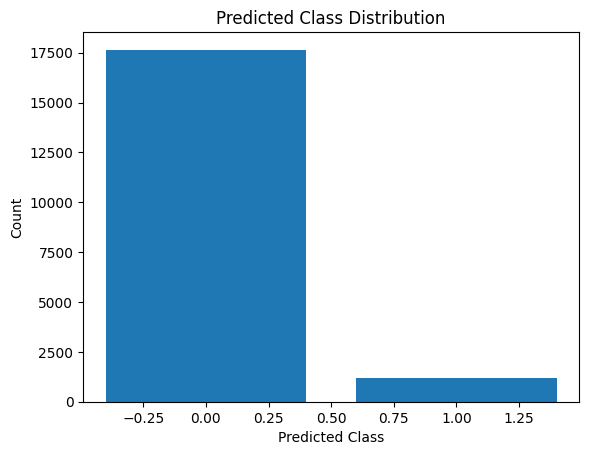

Predicted value: False, Count: 17650
Predicted value: True, Count: 1177


In [94]:
# 이진 분류의 예측값인 y_pred
unique_values, value_counts = np.unique(y_pred, return_counts=True)

plt.bar(unique_values, value_counts)
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.title('Predicted Class Distribution')
plt.show()

# 예측값 count
unique_values, value_counts = np.unique(y_pred, return_counts=True)
for value, count in zip(unique_values, value_counts):
    print(f"Predicted value: {value}, Count: {count}")

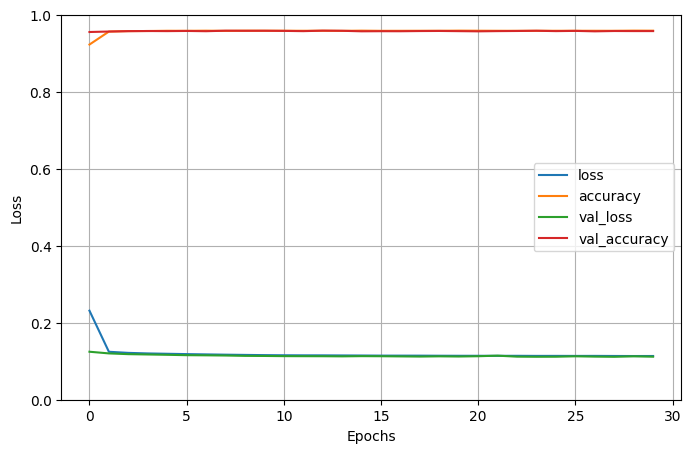

In [95]:
# loss값 시각화
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

**Early stopping**

In [ ]:
# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # 모니터링할 지표 설정
    patience=15,         # 성능이 향상되지 않을 때 얼마나 기다릴지 설정
    restore_best_weights=True  # 최상의 성능을 보인 모델의 가중치로 복원
)

# 신경망 구성
E_model = tf.keras.models.Sequential()
E_model.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
E_model.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
E_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# 컴파일 및 학습
# callbacks = early_stopping 여기서 callbacks은 학습하는 동안의 추가동작으로 이해.
E_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = E_model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
1507/1507 [==============================] - 6s 3ms/step - loss: 0.2424 - accuracy: 0.9173 - val_loss: 0.1272 - val_accuracy: 0.9541
Epoch 2/100
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1264 - accuracy: 0.9554 - val_loss: 0.1205 - val_accuracy: 0.9565
Epoch 3/100
1507/1507 [==============================] - 4s 2ms/step - loss: 0.1229 - accuracy: 0.9577 - val_loss: 0.1185 - val_accuracy: 0.9573
Epoch 4/100
1507/1507 [==============================] - 4s 3ms/step - loss: 0.1215 - accuracy: 0.9579 - val_loss: 0.1176 - val_accuracy: 0.9586
Epoch 5/100
1507/1507 [==============================] - 4s 3ms/step - loss: 0.1206 - accuracy: 0.9589 - val_loss: 0.1177 - val_accuracy: 0.9588
Epoch 6/100
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1201 - accuracy: 0.9591 - val_loss: 0.1165 - val_accuracy: 0.9593
Epoch 7/100
1507/1507 [==============================] - 4s 2ms/step - loss: 0.1192 - accuracy: 0.9594 - val_loss: 0.1156 - val_ac

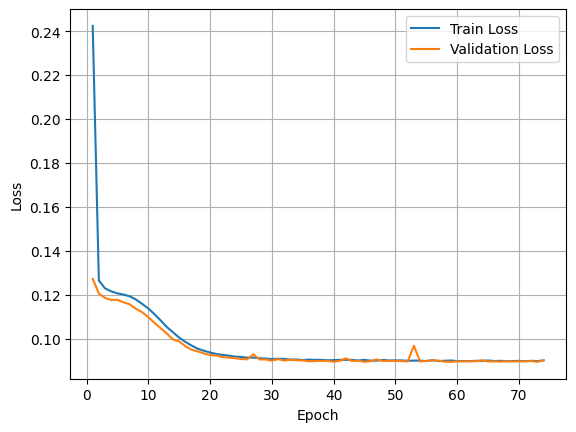

In [ ]:
# 훈련 세트와 검증 세트의 손실 값 저장
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# epoch에 따른 손실 값 그래프
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**k-fold validation**

In [102]:
from sklearn.model_selection import StratifiedKFold

# k-fold 교차 검증을 위해 StratifiedKFold를 사용하여 인덱스를 생성
k = 5  # k-fold의 k 값
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# 성능 지표를 저장할 리스트
accuracy_scores = []

# k-fold validation
fold = 1
for train_index, val_index in skf.split(X, y):
    print(f"Fold: {fold}")
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

    # validation set에서 성능 평가
    accuracy = ann.evaluate(X_val, y_val)
    accuracy_scores.append(accuracy)

    # 한번의 validation이 끝나면 다음 fold로 넘어가게 작성
    fold += 1


Fold: 1
Epoch 1/10
2354/2354 [==============================] - 9s 3ms/step - loss: 0.1177 - accuracy: 0.9584 - val_loss: 0.1135 - val_accuracy: 0.9598
Epoch 2/10
2354/2354 [==============================] - 6s 2ms/step - loss: 0.1174 - accuracy: 0.9585 - val_loss: 0.1106 - val_accuracy: 0.9626
Epoch 3/10
2354/2354 [==============================] - 7s 3ms/step - loss: 0.1172 - accuracy: 0.9585 - val_loss: 0.1126 - val_accuracy: 0.9613
Epoch 4/10
2354/2354 [==============================] - 6s 3ms/step - loss: 0.1166 - accuracy: 0.9595 - val_loss: 0.1126 - val_accuracy: 0.9623
Epoch 5/10
2354/2354 [==============================] - 8s 4ms/step - loss: 0.1166 - accuracy: 0.9591 - val_loss: 0.1136 - val_accuracy: 0.9619
Epoch 6/10
2354/2354 [==============================] - 10s 4ms/step - loss: 0.1167 - accuracy: 0.9591 - val_loss: 0.1217 - val_accuracy: 0.9555
Epoch 7/10
2354/2354 [==============================] - 6s 3ms/step - loss: 0.1169 - accuracy: 0.9587 - val_loss: 0.1109 - val_

In [104]:
# 성능평가
# 리스트에 저장해둔 각 fold의 loss와 accuracy
# 전자는 loss, 후자는 accuracy

accuracy_scores

[[0.1120886355638504, 0.9597917795181274],
 [0.11565428972244263, 0.9580389857292175],
 [0.10751485824584961, 0.964040994644165],
 [0.13155779242515564, 0.9476256370544434],
 [0.10894209146499634, 0.9630298614501953]]